In [1]:
import findspark
from timeit import default_timer as timer
from datetime import timedelta
findspark.init()

from pyspark import SparkContext
sc=SparkContext("local","quiz2")

21/10/29 02:14:31 WARN Utils: Your hostname, jeongsobin-ui-MacBookPro.local resolves to a loopback address: 127.0.0.1; using 172.30.1.53 instead (on interface en0)
21/10/29 02:14:31 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
21/10/29 02:14:32 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
21/10/29 02:14:34 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [2]:
import numpy as np
import math
def create_dataset(N, D=2, minival=[0,0], maxval=[1,1]):
    #D차원 벡터 N개를 생성
    
    dataset=np.zeros((N,D+1))
    
    dataset[:,0]=np.arange(N,dtype='int')
    
    for i in range(D):
        vec=np.random.rand(N)*maxval[i]-minival[i]+minival[i]
        dataset[:,i+1]=vec
        
    return dataset

def compare(x,y):
    if x<y:
        return x
    else:
        return y

def dist(x1, y1, x2, y2):
    return math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

# 블럭1개

In [3]:
g1tod200=sc.parallelize(create_dataset(200))
g1tod200_result=g1tod200.cartesian(g1tod200).map(lambda x:[(x[0][0],x[1][0]),dist(x[0][1],x[0][2],x[1][1],x[1][2])]).filter(lambda x:x[1]<0.01 and x[1]>0)

g1tod400=sc.parallelize(create_dataset(400))
g1tod400_result=g1tod400.cartesian(g1tod400).map(lambda x:[(x[0][0],x[1][0]),dist(x[0][1],x[0][2],x[1][1],x[1][2])]).filter(lambda x:x[1]<0.01 and x[1]>0)


g1tod800=sc.parallelize(create_dataset(800))
g1tod800_result=g1tod800.cartesian(g1tod800).map(lambda x:[(x[0][0],x[1][0]),dist(x[0][1],x[0][2],x[1][1],x[1][2])]).filter(lambda x:x[1]<0.01 and x[1]>0)


g1tod1600=sc.parallelize(create_dataset(1600))
g1tod1600_result=g1tod1600.cartesian(g1tod1600).map(lambda x:[(x[0][0],x[1][0]),dist(x[0][1],x[0][2],x[1][1],x[1][2])]).filter(lambda x:x[1]<0.01 and x[1]>0)



In [12]:
%time g1tod200_result.count()/2

CPU times: user 2.12 ms, sys: 2.77 ms, total: 4.89 ms
Wall time: 184 ms


9.0

In [13]:
%time g1tod400_result.count()/2

CPU times: user 2.33 ms, sys: 1.45 ms, total: 3.78 ms
Wall time: 266 ms


28.0

In [14]:
%time g1tod800_result.count()/2

CPU times: user 2.29 ms, sys: 1.85 ms, total: 4.14 ms
Wall time: 737 ms


113.0

In [15]:
%time g1tod1600_result.count()/2

CPU times: user 2.68 ms, sys: 3.35 ms, total: 6.03 ms
Wall time: 2.81 s


378.0

# 블럭2개

In [8]:
def make2group(x):
    if int(x[0])%2==0:
        return np.array([0,x[1],x[2]]).tolist()
    else:
        return np.array([1,x[1],x[2]]).tolist()
    
g2tod200=sc.parallelize(create_dataset(200)).map(make2group) 
g2tod400=sc.parallelize(create_dataset(200)).map(make2group) 
g2tod800=sc.parallelize(create_dataset(200)).map(make2group)
g2tod1600=sc.parallelize(create_dataset(200)).map(make2group)

## data 200개

In [11]:
g2val0_200=g2tod200.map(lambda x:[(int(x[0])),[x[1],x[2]]]).groupByKey().mapValues(list).filter(lambda x:x[0]==0).flatMap(lambda x:np.array(x[1]))
g2val1_200=g2tod200.map(lambda x:[(int(x[0])),[x[1],x[2]]]).groupByKey().mapValues(list).filter(lambda x:x[0]==1).flatMap(lambda x:np.array(x[1]))
g2_0_0_200=g2val0_200.cartesian(g2val0_200)
g2_0_1_200=g2val0_200.cartesian(g2val1_200)
g2_1_1_200=g2val1_200.cartesian(g2val1_200)

data 200개일때의 threshold=0.6 이하의 거리를 가지는 순서쌍들의 개수와 실행시간 출력

In [14]:
%time g2_0_0_200.map(lambda x:dist(x[0][0],x[0][1],x[1][0],x[1][1])).filter(lambda x:x<0.01 and x>0).count()/2+g2_0_1_200.map(lambda x:dist(x[0][0],x[0][1],x[1][0],x[1][1])).filter(lambda x:x<0.01 and x>0).count()+g2_1_1_200.map(lambda x:dist(x[0][0],x[0][1],x[1][0],x[1][1])).filter(lambda x:x<0.01 and x>0).count()/2

/opt/homebrew/Cellar/apache-spark/3.1.2/libexec/python/lib/pyspark.zip/pyspark/shuffle.py:60: UserWarning: Please install psutil to have better support with spilling


CPU times: user 8.26 ms, sys: 8 ms, total: 16.3 ms
Wall time: 1.26 s


4.0

## data 400개

In [15]:
g2val0_400=g2tod400.map(lambda x:[(int(x[0])),[x[1],x[2]]]).groupByKey().mapValues(list).filter(lambda x:x[0]==0).flatMap(lambda x:np.array(x[1]))
g2val1_400=g2tod400.map(lambda x:[(int(x[0])),[x[1],x[2]]]).groupByKey().mapValues(list).filter(lambda x:x[0]==1).flatMap(lambda x:np.array(x[1]))
g2_0_0_400=g2val0_400.cartesian(g2val0_400)
g2_0_1_400=g2val0_400.cartesian(g2val1_400)
g2_1_1_400=g2val1_400.cartesian(g2val1_400)

data 400개일때의 threshold=0.6 이하의 거리를 가지는 순서쌍들의 개수와 실행시간 출력

In [16]:
%time g2_0_0_400.map(lambda x:dist(x[0][0],x[0][1],x[1][0],x[1][1])).filter(lambda x:x<0.01 and x>0).count()/2+g2_0_1_400.map(lambda x:dist(x[0][0],x[0][1],x[1][0],x[1][1])).filter(lambda x:x<0.01 and x>0).count()+g2_1_1_400.map(lambda x:dist(x[0][0],x[0][1],x[1][0],x[1][1])).filter(lambda x:x<0.01 and x>0).count()/2

/opt/homebrew/Cellar/apache-spark/3.1.2/libexec/python/lib/pyspark.zip/pyspark/shuffle.py:60: UserWarning: Please install psutil to have better support with spilling
/opt/homebrew/Cellar/apache-spark/3.1.2/libexec/python/lib/pyspark.zip/pyspark/shuffle.py:60: UserWarning: Please install psutil to have better support with spilling


CPU times: user 9.05 ms, sys: 11.3 ms, total: 20.4 ms
Wall time: 1.41 s


/opt/homebrew/Cellar/apache-spark/3.1.2/libexec/python/lib/pyspark.zip/pyspark/shuffle.py:60: UserWarning: Please install psutil to have better support with spilling


5.0

## data 800개

In [17]:
g2val0_800=g2tod800.map(lambda x:[(int(x[0])),[x[1],x[2]]]).groupByKey().mapValues(list).filter(lambda x:x[0]==0).flatMap(lambda x:np.array(x[1]))
g2val1_800=g2tod800.map(lambda x:[(int(x[0])),[x[1],x[2]]]).groupByKey().mapValues(list).filter(lambda x:x[0]==1).flatMap(lambda x:np.array(x[1]))
g2_0_0_800=g2val0_800.cartesian(g2val0_800)
g2_0_1_800=g2val0_800.cartesian(g2val1_800)
g2_1_1_800=g2val1_800.cartesian(g2val1_800)

data 800개일때의 threshold=0.6 이하의 거리를 가지는 순서쌍들의 개수와 실행시간 출력

In [18]:
%time g2_0_0_800.map(lambda x:dist(x[0][0],x[0][1],x[1][0],x[1][1])).filter(lambda x:x<0.01 and x>0).count()/2+g2_0_1_800.map(lambda x:dist(x[0][0],x[0][1],x[1][0],x[1][1])).filter(lambda x:x<0.01 and x>0).count()+g2_1_1_800.map(lambda x:dist(x[0][0],x[0][1],x[1][0],x[1][1])).filter(lambda x:x<0.01 and x>0).count()/2

CPU times: user 6.86 ms, sys: 7.84 ms, total: 14.7 ms
Wall time: 1.52 s


9.0

## data 1600개

In [19]:
g2val0_1600=g2tod1600.map(lambda x:[(int(x[0])),[x[1],x[2]]]).groupByKey().mapValues(list).filter(lambda x:x[0]==0).flatMap(lambda x:np.array(x[1]))
g2val1_1600=g2tod1600.map(lambda x:[(int(x[0])),[x[1],x[2]]]).groupByKey().mapValues(list).filter(lambda x:x[0]==1).flatMap(lambda x:np.array(x[1]))
g2_0_0_1600=g2val0_1600.cartesian(g2val0_1600)
g2_0_1_1600=g2val0_1600.cartesian(g2val1_1600)
g2_1_1_1600=g2val1_1600.cartesian(g2val1_1600)

data 1600개일때의 threshold=0.6 이하의 거리를 가지는 순서쌍들의 개수와 실행시간 출력

In [20]:
%time g2_0_0_1600.map(lambda x:dist(x[0][0],x[0][1],x[1][0],x[1][1])).filter(lambda x:x<0.01 and x>0).count()/2+g2_0_1_1600.map(lambda x:dist(x[0][0],x[0][1],x[1][0],x[1][1])).filter(lambda x:x<0.01 and x>0).count()+g2_1_1_1600.map(lambda x:dist(x[0][0],x[0][1],x[1][0],x[1][1])).filter(lambda x:x<0.01 and x>0).count()/2

CPU times: user 8.9 ms, sys: 15.2 ms, total: 24.1 ms
Wall time: 2.02 s


7.0

# 블럭4개

In [21]:
def make4group(x):
    if int(x[0])%4==0:
        return np.array([0,x[1],x[2]]).tolist()
    elif int(x[0])%4==1:
        return np.array([1,x[1],x[2]]).tolist()
    elif int(x[0])%4==2:
        return np.array([2,x[1],x[2]]).tolist()
    else:
        return np.array([3,x[1],x[2]]).tolist()
    
g4tod200=sc.parallelize(create_dataset(200)).map(make2group) 
g4tod400=sc.parallelize(create_dataset(200)).map(make2group) 
g4tod800=sc.parallelize(create_dataset(200)).map(make2group)
g4tod1600=sc.parallelize(create_dataset(200)).map(make2group)

## data 200개

In [22]:
g4val0_200=g4tod200.map(lambda x:[(int(x[0])),[x[1],x[2]]]).groupByKey().mapValues(list).filter(lambda x:x[0]==0).flatMap(lambda x:np.array(x[1]))
g4val1_200=g4tod200.map(lambda x:[(int(x[0])),[x[1],x[2]]]).groupByKey().mapValues(list).filter(lambda x:x[0]==1).flatMap(lambda x:np.array(x[1]))
g4val2_200=g4tod200.map(lambda x:[(int(x[0])),[x[1],x[2]]]).groupByKey().mapValues(list).filter(lambda x:x[0]==2).flatMap(lambda x:np.array(x[1]))
g4val3_200=g4tod200.map(lambda x:[(int(x[0])),[x[1],x[2]]]).groupByKey().mapValues(list).filter(lambda x:x[0]==3).flatMap(lambda x:np.array(x[1]))

g2_0_1_200=g4val0_200.cartesian(g4val1_200)
g2_0_2_200=g4val0_200.cartesian(g4val2_200)
g2_0_3_200=g4val0_200.cartesian(g4val1_200)
g2_1_2_200=g4val1_200.cartesian(g4val2_200)
g2_1_3_200=g4val1_200.cartesian(g4val3_200)
g2_2_3_200=g2_0_2_200.cartesian(g4val3_200)
g2_0_0_200=g4val0_200.cartesian(g4val0_200)
g2_1_1_200=g4val1_200.cartesian(g4val1_200)
g2_2_2_200=g4val2_200.cartesian(g4val2_200)
g2_3_3_200=g4val3_200.cartesian(g4val3_200)

data 200개일때의 threshold=0.6 이하의 거리를 가지는 순서쌍들의 개수와 실행시간 출력

In [23]:
%time g2_0_0_200.map(lambda x:dist(x[0][0],x[0][1],x[1][0],x[1][1])).filter(lambda x:x<0.01 and x>0).count()/2+g2_1_1_200.map(lambda x:dist(x[0][0],x[0][1],x[1][0],x[1][1])).filter(lambda x:x<0.01 and x>0).count()/2+g2_2_2_200.map(lambda x:dist(x[0][0],x[0][1],x[1][0],x[1][1])).filter(lambda x:x<0.01 and x>0).count()/2+g2_3_3_200.map(lambda x:dist(x[0][0],x[0][1],x[1][0],x[1][1])).filter(lambda x:x<0.01 and x>0).count()/2+g2_0_1_200.map(lambda x:dist(x[0][0],x[0][1],x[1][0],x[1][1])).filter(lambda x:x<0.01 and x>0).count()+g2_0_2_200.map(lambda x:dist(x[0][0],x[0][1],x[1][0],x[1][1])).filter(lambda x:x<0.01 and x>0).count()+g2_0_3_200.map(lambda x:dist(x[0][0],x[0][1],x[1][0],x[1][1])).filter(lambda x:x<0.01 and x>0).count()+g2_1_2_200.map(lambda x:dist(x[0][0],x[0][1],x[1][0],x[1][1])).filter(lambda x:x<0.01 and x>0).count()+g2_1_3_200.map(lambda x:dist(x[0][0],x[0][1],x[1][0],x[1][1])).filter(lambda x:x<0.01 and x>0).count()+g2_2_3_200.map(lambda x:dist(x[0][0],x[0][1],x[1][0],x[1][1])).filter(lambda x:x<0.01 and x>0).count()

CPU times: user 21.1 ms, sys: 22.6 ms, total: 43.7 ms
Wall time: 3.31 s


11.0

## data 400개

In [24]:
g4val0_400=g4tod400.map(lambda x:[(int(x[0])),[x[1],x[2]]]).groupByKey().mapValues(list).filter(lambda x:x[0]==0).flatMap(lambda x:np.array(x[1]))
g4val1_400=g4tod400.map(lambda x:[(int(x[0])),[x[1],x[2]]]).groupByKey().mapValues(list).filter(lambda x:x[0]==1).flatMap(lambda x:np.array(x[1]))
g4val2_400=g4tod400.map(lambda x:[(int(x[0])),[x[1],x[2]]]).groupByKey().mapValues(list).filter(lambda x:x[0]==2).flatMap(lambda x:np.array(x[1]))
g4val3_400=g4tod400.map(lambda x:[(int(x[0])),[x[1],x[2]]]).groupByKey().mapValues(list).filter(lambda x:x[0]==3).flatMap(lambda x:np.array(x[1]))

g2_0_1_400=g4val0_400.cartesian(g4val1_400)
g2_0_2_400=g4val0_400.cartesian(g4val2_400)
g2_0_3_400=g4val0_400.cartesian(g4val1_400)
g2_1_2_400=g4val1_400.cartesian(g4val2_400)
g2_1_3_400=g4val1_400.cartesian(g4val3_400)
g2_2_3_400=g4val2_400.cartesian(g4val3_400)
g2_0_0_400=g4val0_400.cartesian(g4val0_400)
g2_1_1_400=g4val1_400.cartesian(g4val1_400)
g2_2_2_400=g4val2_400.cartesian(g4val2_400)
g2_3_3_400=g4val3_400.cartesian(g4val3_400)

data 400개일때의 threshold=0.6 이하의 거리를 가지는 순서쌍들의 개수와 실행시간 출력

In [26]:
%time g2_0_0_400.map(lambda x:dist(x[0][0],x[0][1],x[1][0],x[1][1])).filter(lambda x:x<0.01 and x>0).count()/2+g2_1_1_400.map(lambda x:dist(x[0][0],x[0][1],x[1][0],x[1][1])).filter(lambda x:x<0.01 and x>0).count()/2+g2_2_2_400.map(lambda x:dist(x[0][0],x[0][1],x[1][0],x[1][1])).filter(lambda x:x<0.01 and x>0).count()/2+g2_3_3_400.map(lambda x:dist(x[0][0],x[0][1],x[1][0],x[1][1])).filter(lambda x:x<0.01 and x>0).count()/2+g2_0_1_400.map(lambda x:dist(x[0][0],x[0][1],x[1][0],x[1][1])).filter(lambda x:x<0.01 and x>0).count()+g2_0_2_400.map(lambda x:dist(x[0][0],x[0][1],x[1][0],x[1][1])).filter(lambda x:x<0.01 and x>0).count()+g2_0_3_400.map(lambda x:dist(x[0][0],x[0][1],x[1][0],x[1][1])).filter(lambda x:x<0.01 and x>0).count()+g2_1_2_400.map(lambda x:dist(x[0][0],x[0][1],x[1][0],x[1][1])).filter(lambda x:x<0.01 and x>0).count()+g2_1_3_400.map(lambda x:dist(x[0][0],x[0][1],x[1][0],x[1][1])).filter(lambda x:x<0.01 and x>0).count()+g2_2_3_400.map(lambda x:dist(x[0][0],x[0][1],x[1][0],x[1][1])).filter(lambda x:x<0.01 and x>0).count()

CPU times: user 21.4 ms, sys: 24 ms, total: 45.4 ms
Wall time: 3.41 s


5.0

## data 800개

In [27]:
g4val0_800=g4tod800.map(lambda x:[(int(x[0])),[x[1],x[2]]]).groupByKey().mapValues(list).filter(lambda x:x[0]==0).flatMap(lambda x:np.array(x[1]))
g4val1_800=g4tod800.map(lambda x:[(int(x[0])),[x[1],x[2]]]).groupByKey().mapValues(list).filter(lambda x:x[0]==1).flatMap(lambda x:np.array(x[1]))
g4val2_800=g4tod800.map(lambda x:[(int(x[0])),[x[1],x[2]]]).groupByKey().mapValues(list).filter(lambda x:x[0]==2).flatMap(lambda x:np.array(x[1]))
g4val3_800=g4tod800.map(lambda x:[(int(x[0])),[x[1],x[2]]]).groupByKey().mapValues(list).filter(lambda x:x[0]==3).flatMap(lambda x:np.array(x[1]))

g2_0_1_800=g4val0_800.cartesian(g4val1_800)
g2_0_2_800=g4val0_800.cartesian(g4val2_800)
g2_0_3_800=g4val0_800.cartesian(g4val1_800)
g2_1_2_800=g4val1_800.cartesian(g4val2_800)
g2_1_3_800=g4val1_800.cartesian(g4val3_800)
g2_2_3_800=g4val2_800.cartesian(g4val3_800)
g2_0_0_800=g4val0_800.cartesian(g4val0_800)
g2_1_1_800=g4val1_800.cartesian(g4val1_800)
g2_2_2_800=g4val2_800.cartesian(g4val2_800)
g2_3_3_800=g4val3_800.cartesian(g4val3_800)

data 800개일때의 threshold=0.6 이하의 거리를 가지는 순서쌍들의 개수와 실행시간 출력

In [28]:
%time g2_0_0_800.map(lambda x:dist(x[0][0],x[0][1],x[1][0],x[1][1])).filter(lambda x:x<0.01 and x>0).count()/2+g2_1_1_800.map(lambda x:dist(x[0][0],x[0][1],x[1][0],x[1][1])).filter(lambda x:x<0.01 and x>0).count()/2+g2_2_2_800.map(lambda x:dist(x[0][0],x[0][1],x[1][0],x[1][1])).filter(lambda x:x<0.01 and x>0).count()/2+g2_3_3_800.map(lambda x:dist(x[0][0],x[0][1],x[1][0],x[1][1])).filter(lambda x:x<0.01 and x>0).count()/2+g2_0_1_800.map(lambda x:dist(x[0][0],x[0][1],x[1][0],x[1][1])).filter(lambda x:x<0.01 and x>0).count()+g2_0_2_800.map(lambda x:dist(x[0][0],x[0][1],x[1][0],x[1][1])).filter(lambda x:x<0.01 and x>0).count()+g2_0_3_800.map(lambda x:dist(x[0][0],x[0][1],x[1][0],x[1][1])).filter(lambda x:x<0.01 and x>0).count()+g2_1_2_800.map(lambda x:dist(x[0][0],x[0][1],x[1][0],x[1][1])).filter(lambda x:x<0.01 and x>0).count()+g2_1_3_800.map(lambda x:dist(x[0][0],x[0][1],x[1][0],x[1][1])).filter(lambda x:x<0.01 and x>0).count()+g2_2_3_800.map(lambda x:dist(x[0][0],x[0][1],x[1][0],x[1][1])).filter(lambda x:x<0.01 and x>0).count()

CPU times: user 17.8 ms, sys: 12.7 ms, total: 30.5 ms
Wall time: 2.76 s


3.0

## 데이터 1600개

In [29]:
g4val0_1600=g4tod1600.map(lambda x:[(int(x[0])),[x[1],x[2]]]).groupByKey().mapValues(list).filter(lambda x:x[0]==0).flatMap(lambda x:np.array(x[1]))
g4val1_1600=g4tod1600.map(lambda x:[(int(x[0])),[x[1],x[2]]]).groupByKey().mapValues(list).filter(lambda x:x[0]==1).flatMap(lambda x:np.array(x[1]))
g4val2_1600=g4tod1600.map(lambda x:[(int(x[0])),[x[1],x[2]]]).groupByKey().mapValues(list).filter(lambda x:x[0]==2).flatMap(lambda x:np.array(x[1]))
g4val3_1600=g4tod1600.map(lambda x:[(int(x[0])),[x[1],x[2]]]).groupByKey().mapValues(list).filter(lambda x:x[0]==3).flatMap(lambda x:np.array(x[1]))

g2_0_1_1600=g4val0_1600.cartesian(g4val1_1600)
g2_0_2_1600=g4val0_1600.cartesian(g4val2_1600)
g2_0_3_1600=g4val0_1600.cartesian(g4val1_1600)
g2_1_2_1600=g4val1_1600.cartesian(g4val2_1600)
g2_1_3_1600=g4val1_1600.cartesian(g4val3_1600)
g2_2_3_1600=g4val2_1600.cartesian(g4val3_1600)
g2_0_0_1600=g4val0_1600.cartesian(g4val0_1600)
g2_1_1_1600=g4val1_1600.cartesian(g4val1_1600)
g2_2_2_1600=g4val2_1600.cartesian(g4val2_1600)
g2_3_3_1600=g4val3_1600.cartesian(g4val3_1600)

data 1600개일때의 threshold=0.6 이하의 거리를 가지는 순서쌍들의 개수와 실행시간 출력

In [30]:
%time g2_0_0_1600.map(lambda x:dist(x[0][0],x[0][1],x[1][0],x[1][1])).filter(lambda x:x<0.01 and x>0).count()/2+g2_1_1_1600.map(lambda x:dist(x[0][0],x[0][1],x[1][0],x[1][1])).filter(lambda x:x<0.01 and x>0).count()/2+g2_2_2_1600.map(lambda x:dist(x[0][0],x[0][1],x[1][0],x[1][1])).filter(lambda x:x<0.01 and x>0).count()/2+g2_3_3_1600.map(lambda x:dist(x[0][0],x[0][1],x[1][0],x[1][1])).filter(lambda x:x<0.01 and x>0).count()/2+g2_0_1_1600.map(lambda x:dist(x[0][0],x[0][1],x[1][0],x[1][1])).filter(lambda x:x<0.01 and x>0).count()+g2_0_2_1600.map(lambda x:dist(x[0][0],x[0][1],x[1][0],x[1][1])).filter(lambda x:x<0.01 and x>0).count()+g2_0_3_1600.map(lambda x:dist(x[0][0],x[0][1],x[1][0],x[1][1])).filter(lambda x:x<0.01 and x>0).count()+g2_1_2_1600.map(lambda x:dist(x[0][0],x[0][1],x[1][0],x[1][1])).filter(lambda x:x<0.01 and x>0).count()+g2_1_3_1600.map(lambda x:dist(x[0][0],x[0][1],x[1][0],x[1][1])).filter(lambda x:x<0.01 and x>0).count()+g2_2_3_1600.map(lambda x:dist(x[0][0],x[0][1],x[1][0],x[1][1])).filter(lambda x:x<0.01 and x>0).count()

CPU times: user 16.8 ms, sys: 12.8 ms, total: 29.6 ms
Wall time: 2.28 s


5.0

# Time plot

위의 결과값들을 토대로 작성한 타임플롯입니다.

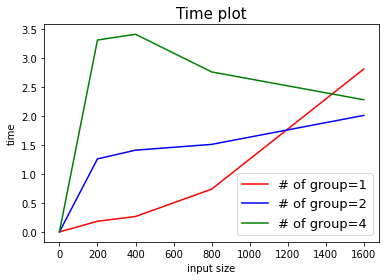

In [16]:
import matplotlib.pyplot as plt
plt.title('Time plot',size=15)
plt.xlabel('input size')
plt.ylabel('time')
plt.plot([0,200,400,800,1600],[0,0.184,0.266,0.737,2.81], 'r',label='# of group=1')
plt.plot([0,200,400,800,1600],[0,1.26,1.41,1.51,2.01], 'b',label='# of group=2')
plt.plot([0,200,400,800,1600],[0,3.31,3.41,2.76,2.28], 'g',label='# of group=4')

plt.legend(fontsize=13)
plt.show()

그룹의 개수가 클수록 감소하는 기울기의 음수의 절대값이 더 크기때문에 인풋사이즈를 더 늘려준다면 group이 1개일때 제일 오래걸리고 그룹의 개수가 많아질수록 적게 걸리는 타임플롯이 나올거라고 생각합니다.